In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("tickets.csv")

In [3]:
df["ticket"][3]

'test-vm-01: VMware: VM CPU Usage Has Exceeded Threshold (95%), currently (100.0%)'

In [4]:
df["ticket"][100].split(":")[1]

' Device Failed Availability Check'

In [5]:
df["ticket"][3][0:4]

'test'

In [6]:
def take_main_fail(text):
    try:
        if text[0:4] == 'test':
            end_text = text.split(":")[2]
        else:
            end_text = text.split(":")[1]
    except:
        end_text = text
    
    return end_text

In [7]:
df["main_text"] = df["ticket"].apply(lambda x :take_main_fail(x))

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2021-09-09 00:33:35.927278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-09 00:33:35.927309: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
X_train = df["main_text"]

In [10]:
max_len = np.max(X_train.apply(lambda x :len(x)))
print(max_len)

144


In [11]:
tokenizer = Tokenizer()

In [12]:
tokenizer.fit_on_texts(X_train)
vocab_length = len(tokenizer.word_index) + 1

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')

In [13]:
X_train

array([[ 6,  8,  7, ...,  0,  0,  0],
       [18, 20, 23, ...,  0,  0,  0],
       [ 1,  4,  2, ...,  0,  0,  0],
       ...,
       [62, 63, 64, ...,  0,  0,  0],
       [ 6,  8,  7, ...,  0,  0,  0],
       [14, 12, 11, ...,  0,  0,  0]], dtype=int32)

In [14]:
print(vocab_length)

499


In [15]:
X_train.shape

(5446, 144)

In [16]:
from sklearn.cluster import KMeans

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
wss=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_train)
    wss.append(kmean.inertia_)

Text(0.5, 1.0, 'Finding optimal K kluster')

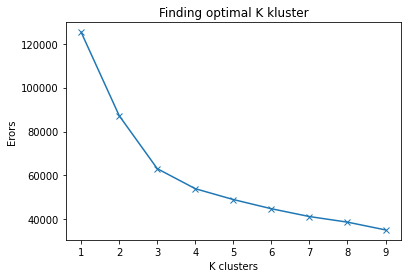

In [21]:
plt.plot(K,wss,marker='x')
plt.xlabel('K clusters')
plt.ylabel('Erors')
plt.title("Finding optimal K kluster")

In [22]:
mod = KMeans(n_clusters=4, random_state=0).fit(X_train)

In [23]:
labels = mod.fit_predict(X_train)

In [24]:
df['clusters'] = labels

In [25]:
df["clusters"].replace({1:"Gorup 1",2:"Gorup 2",0:"Gorup 3",3:"Gorup 4",},inplace=True)

In [26]:
df_gr1 = df[df["clusters"]=="Gorup 1"]

In [27]:
df_gr1

,ticket,main_text,clusters
4890,db22.qa.nec.com: Memory Pages is currently 99....,Memory Pages is currently 99.5597729813 which...,Gorup 1


In [56]:
df["ticket"][1000]

'eit-pricommsrv1.tgna.tegna.com: Device Failed Availability Check: UDP - SNMP'

In [58]:
df["ticket"][777]

'etm-priwodv13.tgna.tegna.com: Device Failed Availability Check: UDP - SNMP'